In [64]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import silhouette_samples
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
from sklearn import metrics


In [65]:
def choose_random(K, vec):
    m = len(vec)
    idx = np.random.randint(0, m, K)
    return vec[idx]

def Cost_Function(mu, c, vec):
    return ((mu[c] - vec) ** 2).sum() / vec.shape[0]

def distance(x_1, x_2):
    return np.matmul((x_1-x_2), (x_1-x_2).transpose())

def cluster_assignment(mu, vec):
    return ((vec - mu[:, np.newaxis]) ** 2).sum(axis=2).argmin(axis=0)

def move_centroid(mu, c, vec):
    for i in range(len(mu)):
        vec_sub = vec[c==i]
        mu[i] = np.mean(vec_sub, axis=0)
    return mu

def k_means(X, K, plot=True, verbose=False):
    l, w = X.shape
    
    mu = choose_random(K, X)
    c = cluster_assignment(mu, X)
    last_dist = Cost_Function(mu, c, X) + 100
    curr_dist = last_dist - 100
    history = [curr_dist]
    while last_dist - curr_dist > 1:
        last_dist = curr_dist
        c = cluster_assignment(mu, X)
        if verbose:
            print(curr_dist)
        mu = move_centroid(mu, c, X)    
        curr_dist = Cost_Function(mu, c, X)
        history.append(curr_dist)
    if plot:
        img_compressed = mu[c].reshape(X.shape)
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 3)
        plt.plot(range(len(history)), history)
        plt.title('Cost over iterations')
        plt.xlabel('iterations')
        plt.ylabel('Cost')
    return mu, c, history[-1]

For K= 1
For K= 2
For K= 3
For K= 4
For K= 5
For K= 6
For K= 7
For K= 8
For K= 9
For K= 10


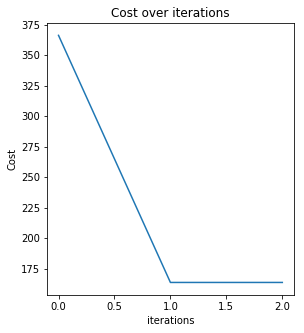

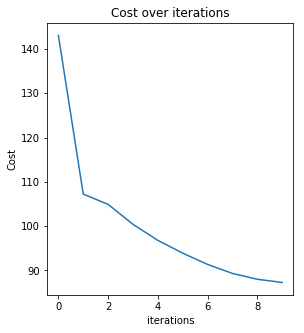

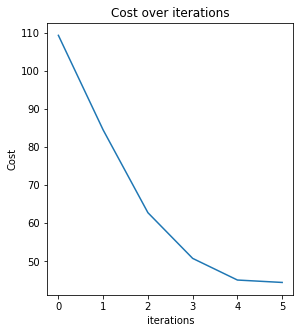

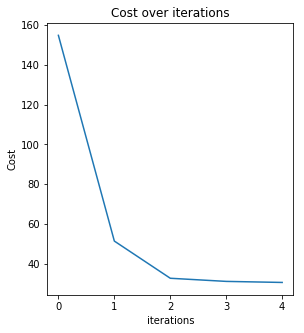

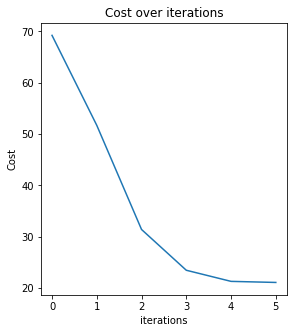

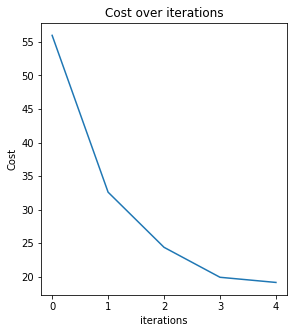

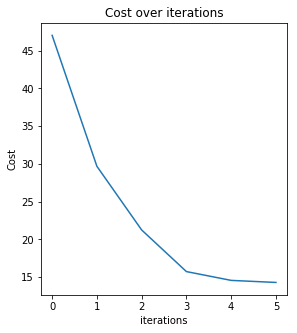

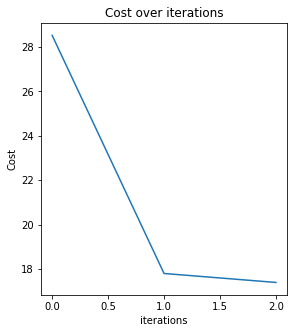

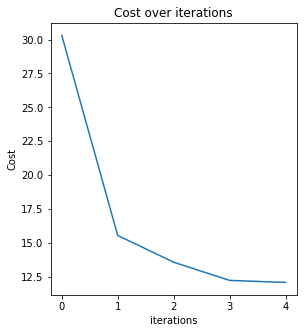

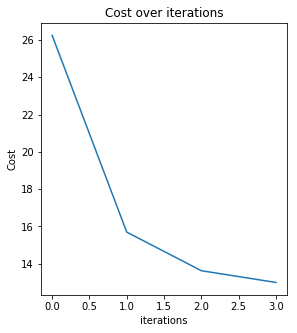

In [66]:
data = np.loadtxt("Aggregation.txt")
X = data[:,0:2]
for i in range(1,11):
    print("For K=",i)
    mu, c, dist = k_means(X, i)
    



In [67]:
def elbow(X):
    K_hist = []
    dist_hist = []
    for K in tqdm(range(1, 10)):
        K_hist.append(K)
        mu, c, dist = k_means(X, K, plot=False)
        dist_hist.append(dist)
    plt.plot(K_hist, dist_hist)
    print("Cost Function:",dist_hist)
    plt.xlabel("K")
    plt.ylabel("Cost function")


Cost Function: [163.68192126021026, 86.91206581727361, 61.92250631062533, 30.99382464940215, 21.28218474323017, 16.543460168396205, 17.961349697238013, 12.723479418822112, 10.937420312997268]


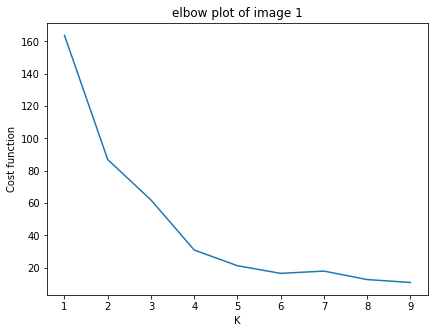

In [68]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('elbow plot of image 1')
elbow(X)